In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from scipy import stats
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

##### Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted separately, and adding this result to seasonally adjusted M1.
Source: https://fred.stlouisfed.org/series/M2SL

In [3]:
# Pull M2 Supply data
m2_supply = fred.get_series('M2SL', observation_start='2010-01-01')
m2_supply = m2_supply.dropna()
m2_supply.tail()

2022-11-01    21396.9
2022-12-01    21357.7
2023-01-01    21212.0
2023-02-01    21075.4
2023-03-01    20818.1
dtype: float64

In [10]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2010-01-01" 
end= "2023-03-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-25,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3.877700e+09
2023-02-26,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3.877700e+09
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3.836950e+09
2023-02-28,3977.189941,3997.500000,3968.979980,3970.149902,3970.149902,5.043400e+09
2023-03-01,3963.340088,3971.729980,3939.050049,3951.389893,3951.389893,4.249480e+09


In [11]:
# Pull Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
cpi = fred.get_series('CPIAUCSL', observation_start='2010-01-01')
cpi.tail()

2022-11-01    298.598
2022-12-01    298.990
2023-01-01    300.536
2023-02-01    301.648
2023-03-01    301.808
dtype: float64

In [12]:
# Pull US GDP data
gdp = fred.get_series('GDP', observation_start='2010-01-01')
gdp.tail()

2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25723.941
2022-10-01    26137.992
2023-01-01    26465.865
dtype: float64

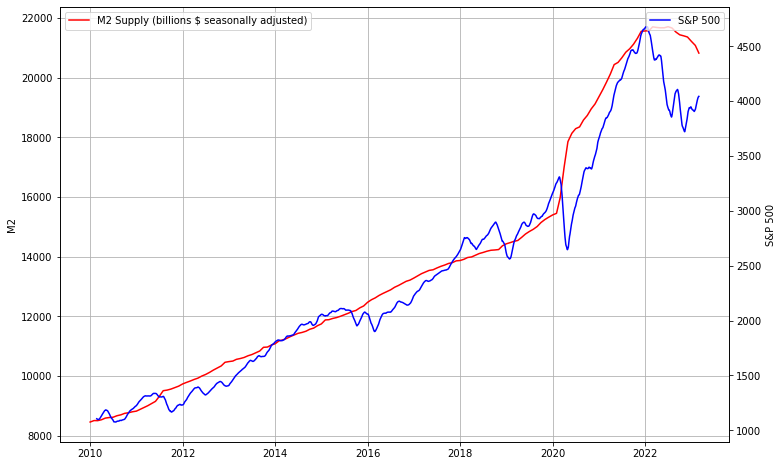

In [13]:
# Plot M2 Supply vs S&P 500
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply, label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['Adj Close'].rolling(window=50).mean(), label ='S&P 500', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

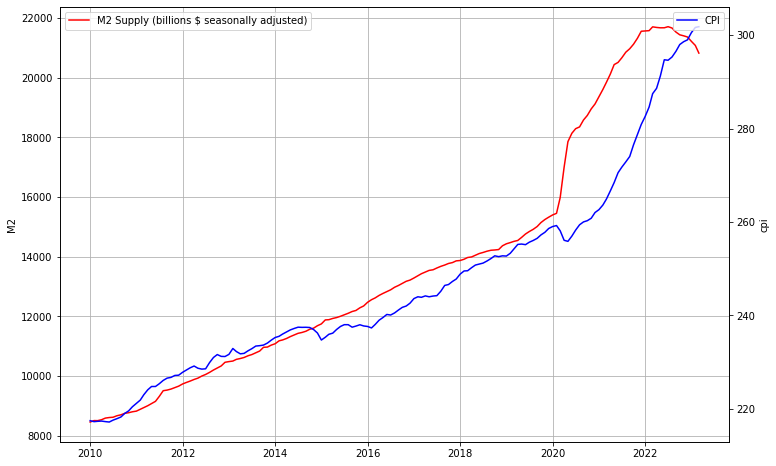

In [14]:
# Plot M2 Supply vs CPI
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply, label ='M2 Supply (billions $ seasonally adjusted)', color='r')
ax.set_ylabel('M2')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(cpi, label ='CPI', color='b')
ax2.set_ylabel('cpi')
ax2.legend(loc='upper right')

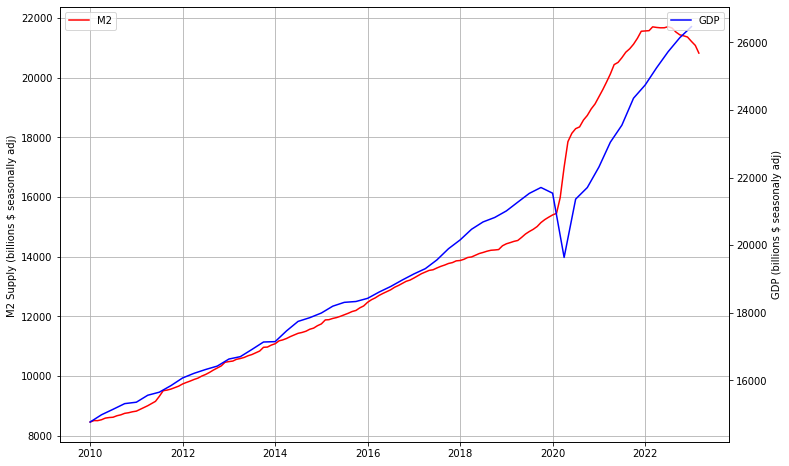

In [15]:
# Plot M2 Supply vs GDP
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(m2_supply, label ='M2', color='r')
ax.set_ylabel('M2 Supply (billions $ seasonally adj) ')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(gdp, label ='GDP', color='b')
ax2.set_ylabel('GDP (billions $ seasonaly adj)')
ax2.legend(loc='upper right')